# Apprentice Chef Case Study - Revenue Prediction

    Owner: Jason Lee
    Date: March 7, 2020
    Topic: Machine Learning

## Company Information
 
Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home. Developed for the busy professional that has little to no skills in the kitchen, they offer a wide selection of daily-prepared gourmet meals delivered directly to your door.

Each meal set takes at most 30 minutes to finish cooking at home and also comes with Apprentice Chef's award- winning disposable cookware (i.e. pots, pans, baking trays, and utensils), allowing for fast and easy cleanup. Ordering meals is very easy given their user-friendly online platform and mobile app. 

## Objective
After three years serving customers across the San Francisco Bay Area, the executives at Apprentice Chef have come to realize that over 90% of their revenue comes from customers that have been ordering meal sets for 12 months or less.

Given this information, they would like to better understand how much revenue to expect from each customer within their first year of orders. Thus, they have hired you on a full-time contract to analyze their data, develop your top insights, and build a machine learning model to predict revenue over the first year of each customer’s life cycle. 

## Dataset Metadata
Column	|Description|
:--|:--|
REVENUE	|Total revenue generated over the first year of a customer's journey|
CROSS_SELL_SUCCESS	|Success of promoting Halfway There (1 = SUCCESS, 0 = FAIL)|
NAME|	Full name of customer (collected upon initial registration)|
EMAIL	|Email of customer (collected upon initial registration)|
FIRST_NAME	|First name of customer (collected upon initial registration)|
FAMILY_NAME	|Last name of customer (collected upon initial registration)|
TOTAL_MEALS_ORDERED|	Total count of meals ordered per customer account|
UNIQUE_MEALS_PURCH|	Count of unique meal sets ordered per customer account|
CONTACTS_W_CUSTOMER_SERVICE	|Count of times a customer made contact with customer service (phone, chatbot, or email)|
PRODUCT_CATEGORIES_VIEWED	|Total number of meal categories viewed (online and mobile platforms combined)|
AVG_TIME_PER_SITE_VISIT	|Average platform (web or mobile) visit time per customer account|
MOBILE_NUMBER|	Customer registered with a mobile or landline number (1 = MOBILE, 0 = LANDLINE)|
CANCELLATIONS_BEFORE_NOON	|Number of meals canceled before 12 PM as per cancelation policy|
CANCELLATIONS_AFTER_NOON|	Number of meals canceled after 3 PM as per cancelation policy|
TASTES_AND_PREFERENCES	|Customer specified their tastes and preferences in their profile|
MOBILE_LOGINS|	Count of logins on the mobile platform (app)|
PC_LOGINS|	Count of logins on the web platform (website)|
WEEKLY_PLAN|	Count of weeks a customer subscribed to the weekly plan|
EARLY_DELIVERIES	|Count of orders that we delivered BEFORE the alloted delivery time|
LATE_DELIVERIES	|Count of orders that we delivered AFTER the alloted delivery time|
PACKAGE_LOCKER|	Customer's building has a package locker service or package room|
REFRIGERATED_LOCKER|	Package room has a refrigerated locker|
FOLLOWED_RECOMMENDATIONS_PCT	|Percentage of time a customer followed meal recommendations generated displayed on the web or mobile platform|
AVG_PREP_VID_TIME|	Average time in seconds a customer watched  instructional videos for meal preparation|
LARGEST_ORDER_SIZE	|Largest number of meals a customer has ordered in a single order|
MASTER_CLASSES_ATTENDED|	Count of times a customer attended master class (learning to cook)|
MEDIAN_MEAL_RATING|	Median meal satisfaction rating by customer|
AVG_CLICKS_PER_VISIT|	Average number of clicks per site visit|
TOTAL_PHOTOS_VIEWED|	Count of photos viewed on web and mobile platforms (measured in clicks)|



-------------------------------------------

## Report Overview

    1. Exploration
        - Missing values
        - Descriptive statistics
        - Potential outliers
    
    2. Feature Engineering
        - Logarithm
        - Outlier Distribution
        - Trend Analysis
        - Email Grouping
        - Email Dummy Variables
        
    3. Model Building
        I.  Stats Model
              - Original Model
              - After removing p-values
        II. Scikit Learn 
              - Train/Test Split
                  - Using new X Variables
              - Ordinary Least Squares (OLS) Regression
              - Ridge Regression
              - Lasso Regression
              - ARD Regression
              - Gradient Boosting Regressor
              - K Nearest Neighbors
                  - Standardized
                  - Non Standardized
        
    4. Model Performance
        - Overall Results
        
    5. Project Overview
        - Insights
        - Recommendations
        
    6. Sources

-----------------------------------


# 1. Exploratory Analysis

In [1]:
#data information
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# soft code file name
file = "Apprentice_Chef_Dataset.xlsx"

#dataframe
original_df = pd.read_excel(file)

### Data Types

In [2]:
# original_df.info()

 - Customer information are the only categorical values - NAME, EMAIL, FIRST_NAME, & FAMILY_NAME
 - Only missing values are related to FAMILY_NAME (47 missing total)
 
 __________________________________________________________________________________________________________________________

### Missing Values
Since FAMILY_NAME is the only one missing values, we can create a missing value column but since there is only 47 values missing it won't make a significant impact. FAMILY_NAME could also be a redundant column since we have the full name. 
- We can check if there are any large families in the dataset.

In [3]:
# # looping over columns with missing values
# for col in original_df:

#     # creating columns with 1s if missing and 0 if not
#     if original_df[col].isnull().astype(int).sum() > 0:
#         original_df['missing_'+col] = original_df[col].isnull().astype(int)

In [4]:
# original_df['FAMILY_NAME'].value_counts().head(10)

Family Name | Count |
---|---|
Frey         | 79
Stark        | 32
Lannister    | 29
Tyrell       | 28
Targaryen    | 24
Targaryen    | 17
Greyjoy      | 16
Hightower    | 16
Florent      | 14
Vance        | 14

- Despite the there being a handful of families with over 10 members in the family(code above), there are many more families with a single member. 
- We will proceed to drop the FAMILY_NAME column later on when we build features.

-------------------------------------------

## Descriptive Statistics

In [5]:
# descriptive statistics
original_df.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


### Overview

  - Possible binary options - CROSS_SELL_SUCCESS, MOBILE_NUMBER, TASTES_AND_PREFERENCES, PACKAGE_LOCKER, REFRIGERATED_LOCKER
  - max REVENUE is significantly higher that mean and median values - 8793.75
  - TOTAL_MEALS_ORDERED - almost 500 orders for a single customer - 493
  - AVG_TIME_PER_SITE_VISIT, one customer visits the site 1645.60
  - WEEKLY_PLAN, a customer orders 52 meals a week - interesting, normally 3 meals a day on average = 28 meals a week.
  - AVG_PREP_VID_TIME, max time a customer watches videos is 564.20 - abnormal compared to others.
  - TOTAL_PHOTOS_VIEWED, very active customer viewing photos - 1600

Looking at all these numbers is clear that there is a lot of suspicious MAX values for a variety of columns, which will be worth checking if they belong to the same individual or multiple.

### Checking Outliers
To get a better understanding on the users, below explores if there are any repetitive users or patterns that are standing out in more than one column.

In [6]:
# # check max revenue user
# print(original_df[original_df["REVENUE"]==8793.75]['NAME'])

# # check max orders user
# print(original_df[original_df["TOTAL_MEALS_ORDERED"]==493]['NAME'])

# # check max orders user
# print(original_df[original_df["TOTAL_MEALS_ORDERED"]==493]['NAME'])

# # check max weekly plan user
# print(original_df[original_df["WEEKLY_PLAN"]==52]['NAME'])

# # check max vide watching time user
# print(original_df[original_df["AVG_PREP_VID_TIME"]==564.20]['NAME'])

# # check max photo viewed time user
# print(original_df[original_df["TOTAL_PHOTOS_VIEWED"]==1600]['NAME'])

### Overview
The results from the analysis above are:

    - Leyla Hightower is the user with the highest revenue at $8793
    - Steffon Baratheon is the user with the max orders at 493
    - Preston Greenfield has spent the most time visit Apprentice Chef with 1645.60 mins
    - There are 17 users that all have the maximum weekly plan of 52 meals
    - Turnip has spend the most time watching video with 564.20 mins
    - Maron Greyjoy has viewed the most photos by a significant amount with 1600 photos viewed.

After looking into each abnormal pattern in potential outliers, none of our customers appeared more than once. This tells us there is no overlap in having a single user skewing all the results.


Breaking down the dataset, we can see that several customers have high numbers for values that you would assume would positively affect revenue, but it did not. For example, despite the customer with the most orders (493 orders), 52 other customers had more revenue. With this information, it would signal substantial discounts or inconsistent pricing. Similarly, we see the customer with the highest amount of time spent on the website with 2685 minutes, had less revenue than 480 customers (almost 25% of the customer base).


Let's explore potential outliers further by graphing the variables and spot any meaning full patterns.

### Top 200 Customers (Based on Revenue)
Below we see a side by side comparison of the top 200 customers based on revenue compared to the rest of th dataset

In [7]:
# original_df.nlargest(200, 'REVENUE').median()

Variable | Median Score (Top 200) | Median (All Customers) |
-------------| ----------| ---------------|
REVENUE                        | 4500.00 | 1740.00	
TOTAL_MEALS_ORDERED            |  120.00  | 60.00
CONTACTS_W_CUSTOMER_SERVICE    |    8.00  | 7.00
AVG_TIME_PER_SITE_VISIT        |  122.92  | 94.16
CANCELLATIONS_AFTER_NOON        |   0.00  | 1.00
AVG_PREP_VID_TIME              |  212.15  | 145.60	
LARGEST_ORDER_SIZE             |    6.00  | 4.00	
MEDIAN_MEAL_RATING             |    4.00  | 3.00
TOTAL_PHOTOS_VIEWED            |  300.00  | 0.00

We can see that comparing our highest revenue customer with our entire dataset we see that they are performing better in categories based on product engagement and experience.

# 2. Feature Engineering
Our goal is to develop the best model to help predict the amount of revenue a customer will bring into the company in their first year. In order to accomplish this we will need to engineer additional features to help enhance the model's performance. We are given a set amount of data inputs but in order to have a more robust model, we need to develop intuition and strategies for new features.


<i> The features in your data will directly influence the predictive models you use and the results you can achieve. </i> (Source: [Brownlee (2019) Machine Learning Mastery](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/))


Before developing new features let's breakdown the types of variables we have.


BINARY:

    - CROSS_SELL_SUCCESS	
    - TASTES_AND_PREFERENCES
    - PACKAGE_LOCKER
    - REFRIGERATED_LOCKER

CATEGORICAL:

    - MOBILE_NUMBER
    
CONTINUOUS OR INTERVAL:

    - AVG_TIME_PER_SITE_VISIT
    - AVG_PREP_VID_TIME	

COUNT:

    - TOTAL_MEALS_ORDERED
    - UNIQUE_MEALS_PURCH
    - CONTACTS_W_CUSTOMER_SERVICE
    - PRODUCT_CATEGORIES_VIEWED
    - CANCELLATIONS_BEFORE_NOON
    - CANCELLATIONS_AFTER_NOON
    - PC_LOGINS	
    - MOBILE_LOGINS
    - WEEKLY_PLAN	
    - EARLY_DELIVERIES	
    - LATE_DELIVERIES
    - FOLLOWED_RECOMMENDATIONS_PCT
    - LARGEST_ORDER_SIZE
    - MASTER_CLASSES_ATTENDED         
    - MEDIAN_MEAL_RATING
    - AVG_CLICKS_PER_VISIT
    - TOTAL_PHOTOS_VIEWED
    
DISCRETE:

    - NAME                           
    - EMAIL                           
    - FIRST_NAME                      
    - FAMILY_NAME
    

The first feature we will develop will be the log of selected variables. The variables selected are based on the type and the value it will have on the final mode. Using log's will transform the values and help produce a more normal distribution amongst the respective variables.

------------------------

## Feature - Log
In this step we will obtain the logs of selected variables. Since most of the variables are all set on different scales and units, using log reduces the possible range and prevents skewness. We get the logs to ensure we have consistent range of measurements and it will add more stability to our model. The benefits of using log include the following:

    - Manages skewed data
    - Distribution resembles Gaussian
    - Decreases effects from outliers
    - More robust model
    
Source: [Ençberoğlu (2019) - Towards Data Science](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)

In [8]:
# for loop to get the log of select columns
log_list = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
            'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT','PC_LOGINS',
            'AVG_PREP_VID_TIME','MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT']

for column in log_list:
    original_df['log_'+ column] = original_df[column].transform(np.log)

We now have 9 new columns that will hold their respective log values. The columns will be labeled with "log_column_name".

Example:

        log_PRODUCT_CATEGORIES_VIEWED

## Feature - Outlier Detection (Thresholds)
As we mentioned earlier there were several customers that flagged some potential outliers in the exploration page. To address this, we can use normal distribution graphs to identify, and use the insights to set threshold boundaries for creating outlier specific features.

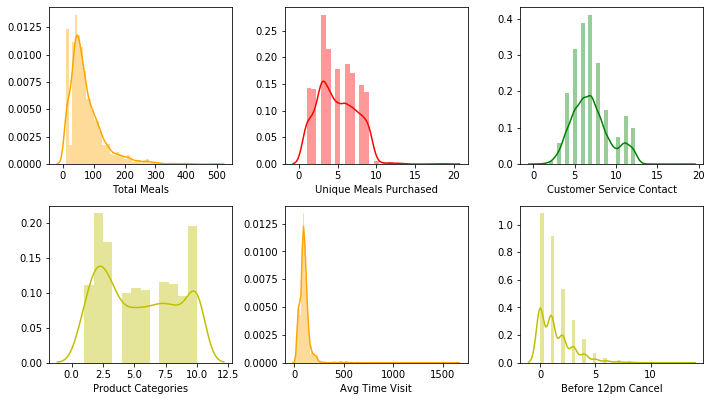

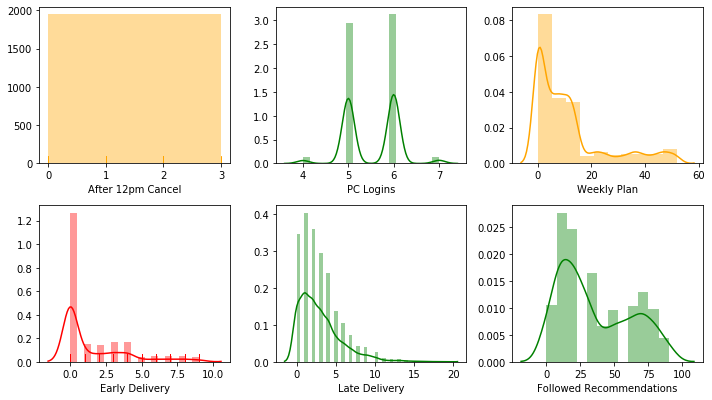

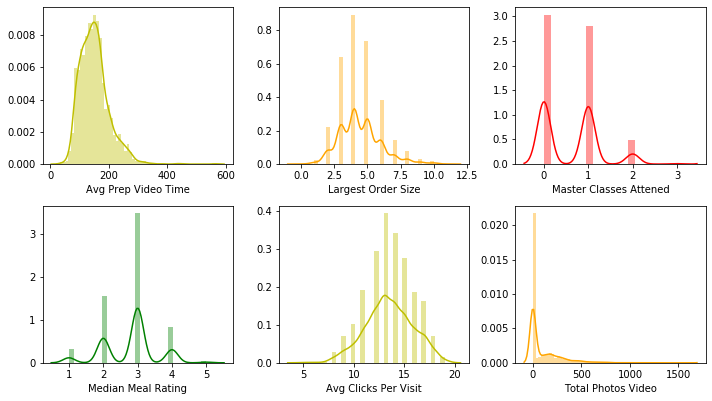

In [9]:
# histograms

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(3, 3, 1)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Total Meals')

########################
plt.subplot(3, 3, 2)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Unique Meals Purchased')

########################

plt.subplot(3, 3, 3)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Customer Service Contact')

########################

plt.subplot(3, 3, 4)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Product Categories')

########################

plt.subplot(3, 3, 5)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Avg Time Visit')

##########################

plt.subplot(3, 3, 6)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Before 12pm Cancel')

plt.tight_layout()

########################
########################
fig, ax = plt.subplots(figsize = (10, 8))

plt.subplot(3, 3, 1)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('After 12pm Cancel')

########################

plt.subplot(3, 3, 2)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC Logins')

########################

plt.subplot(3, 3, 3)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins = 10,
             color = 'orange')
plt.xlabel('Weekly Plan')

########################

plt.subplot(3, 3, 4)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins = 'fd',
             rug  = True,
             color = 'r')
plt.xlabel('Early Delivery')

########################

plt.subplot(3, 3, 5)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Late Delivery')


########################

plt.subplot(3, 3, 6)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Followed Recommendations')

plt.tight_layout()

########################
########################
fig, ax = plt.subplots(figsize = (10, 8))

plt.subplot(3, 3, 1)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Avg Prep Video Time')

########################

plt.subplot(3, 3, 2)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Largest Order Size')

########################
plt.subplot(3, 3, 3)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Master Classes Attened')

########################

plt.subplot(3, 3, 4)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Median Meal Rating')

########################

plt.subplot(3, 3, 5)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Avg Clicks Per Visit')

########################

plt.subplot(3, 3, 6)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Total Photos Video')
plt.tight_layout()
########################

- Looking at each of these graphs, we want to make threshold  minimum and maximum limits for each variable. Below are the threshold limits and reasoning as to why they were set.

In [10]:
# Setting thresholds for features
TOTAL_MEALS_ORDERED_hi           = 150         # we can see a normal distribution if we cut of at this point
UNIQUE_MEALS_PURCH_hi            = 8           # we can see a normal distribution if we cut of at this point
CONTACTS_W_CUSTOMER_SERVICE_hi   = 9           # we can see a normal distribution if we cut of at this point
PRODUCT_CATEGORIES_VIEWED_lo     = 2           # setting this as MIN will exclude outliers
PRODUCT_CATEGORIES_VIEWED_hi     = 8           # setting this as MAX will exclude outliers
AVG_TIME_PER_SITE_VISIT_hi       = 175         # we can see a normal distribution if we cut of at this point
CANCELLATIONS_BEFORE_NOON_hi     = 3           # setting this as MIN will exclude outliers
CANCELLATIONS_AFTER_NOON_hi      = 0           # setting this as MIN will exclude outliers
PC_LOGINS_lo                     = 5           # setting this as MIN will exclude outliers
PC_LOGINS_hi                     = 6           # setting this as MAX will exclude outliers
WEEKLY_PLAN_hi                   = 18          # we can see a normal distribution if we cut of at this point
EARLY_DELIVERIES_hi              = 2           # we can see a normal distribution if we cut of at this point
LATE_DELIVERIES_hi               = 7           # we can see a normal distribution if we cut of at this point
AVG_PREP_VID_TIME_hi             = 250         # we can see a normal distribution if we cut of at this point
LARGEST_ORDER_SIZE_lo            = 3           # setting this as MIN will exclude outliers
LARGEST_ORDER_SIZE_hi            = 6           # setting this as MAX will exclude outliers  
MASTER_CLASSES_ATTENDED_hi       = 1           # we can see a normal distribution if we cut of at this point
MEDIAN_MEAL_RATING_hi            = 3           # we can see a normal distribution if we cut of at this point
AVG_CLICKS_PER_VISIT_lo          = 9           # setting this as MIN will exclude outliers
AVG_CLICKS_PER_VISIT_hi          = 17.5        # setting this as MAX will exclude outliers 
TOTAL_PHOTOS_VIEWED_hi           = 50          # we can see a normal distribution if we cut of at this point

Now that we have our thresholds, we can set the parameters for building each new feature. We will focus on creating new features by tagging a number 1, if a variable is greater or less than the thresholds we set earlier. The format for outlier columns will follow the same format as previous example - out_column_name"

Example:

    out_TOTAL_MEALS_ORDERED

In [11]:
# Feature Engineering (outlier thresholds)
###########################################


# total meals ordered
original_df['out_TOTAL_MEALS_ORDERED'] = 0
total_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = total_hi,
                                value      = 1,
                                inplace    = True)

# unique meals purchase
original_df['out_UNIQUE_MEALS_PURCH'] = 0
unique_hi = original_df.loc[0:,"out_UNIQUE_MEALS_PURCH"][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = unique_hi,
                                    value = 1,
                                    inplace = True)

# customer service contacts
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
customer_service_hi = original_df.loc[0:,"out_CONTACTS_W_CUSTOMER_SERVICE"][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = customer_service_hi,
                                    value = 1,
                                    inplace = True)

# product categories viewed
original_df['out_PRODUCT_CATEGORIES_VIEWED'] = 0
product_hi = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_hi]
product_lo = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_lo]

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = product_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = product_lo,
                                 value      = 1,
                                 inplace    = True)


# average visit time
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
avg_time_hi = original_df.loc[0:,"out_AVG_TIME_PER_SITE_VISIT"][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = avg_time_hi,
                                    value = 1,
                                    inplace = True)

# before noon cancels
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
before_noon_hi = original_df.loc[0:,"out_CANCELLATIONS_BEFORE_NOON"][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = before_noon_hi,
                                    value = 1,
                                    inplace = True)

# after noon cancels
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
after_noon_hi = original_df.loc[0:,"out_CANCELLATIONS_AFTER_NOON"][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = after_noon_hi,
                                    value = 1,
                                    inplace = True)

# product categories viewed
original_df['out_PC_LOGINS'] = 0
pc_logins_hi = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_hi]
pc_logins_lo = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] < PC_LOGINS_lo]

original_df['out_PC_LOGINS'].replace(to_replace = pc_logins_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_PC_LOGINS'].replace(to_replace = pc_logins_lo,
                                 value      = 1,
                                 inplace    = True)


# weekly plan
original_df['out_WEEKLY_PLAN'] = 0
weekly_hi = original_df.loc[0:,"out_WEEKLY_PLAN"][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

original_df['out_WEEKLY_PLAN'].replace(to_replace = weekly_hi,
                                    value = 1,
                                    inplace = True)

# early delivery
original_df['out_EARLY_DELIVERIES'] = 0
early_hi = original_df.loc[0:,"out_EARLY_DELIVERIES"][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = early_hi,
                                    value = 1,
                                    inplace = True)

# late delivery
original_df['out_LATE_DELIVERIES'] = 0
late_hi = original_df.loc[0:,"out_LATE_DELIVERIES"][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['out_LATE_DELIVERIES'].replace(to_replace = late_hi,
                                    value = 1,
                                    inplace = True)

# avergae video time
original_df['out_AVG_PREP_VID_TIME'] = 0
avg_video_hi = original_df.loc[0:,"out_AVG_PREP_VID_TIME"][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = avg_video_hi,
                                    value = 1,
                                    inplace = True)

# largest order size
original_df['out_LARGEST_ORDER_SIZE'] = 0
order_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
order_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = order_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = order_lo,
                                 value      = 1,
                                 inplace    = True)


# master classess attended
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
master_hi = original_df.loc[0:,"out_MASTER_CLASSES_ATTENDED"][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = master_hi,
                                    value = 1,
                                    inplace = True)

# meal rating
original_df['out_MEDIAN_MEAL_RATING'] = 0
rating_hi = original_df.loc[0:,"out_MEDIAN_MEAL_RATING"][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = rating_hi,
                                    value = 1,
                                    inplace = True)


# average clicks per visit
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
clicks_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
clicks_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = clicks_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = clicks_lo,
                                 value      = 1,
                                 inplace    = True)

# total photos viewed
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
photos_hi = original_df.loc[0:,"out_TOTAL_PHOTOS_VIEWED"][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = photos_hi,
                                    value = 1,
                                    inplace = True)




Before we move onto the next feature stage let's make sure the columns were update correctly.

In [12]:
# original_df.columns

We can see that both the log and outlier columns were updated and are ready for feature engineering. Next we will focus on developing features based on trends from scatter plot analysis.

-----------------------------------------------------

## Feature - Trend Analysis (Thresholds)
Using scatter plots will help provide insights on if there are any clusters forming, and if we can identify any patterns outside of outliers. This process will require setting thresholds based on when items seem to be scattering more, or clustering more.

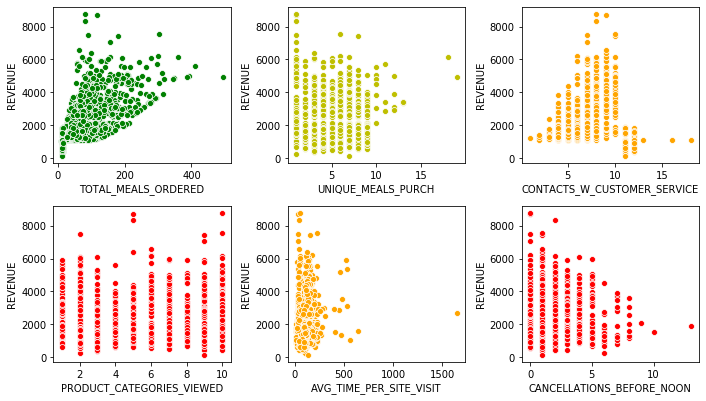

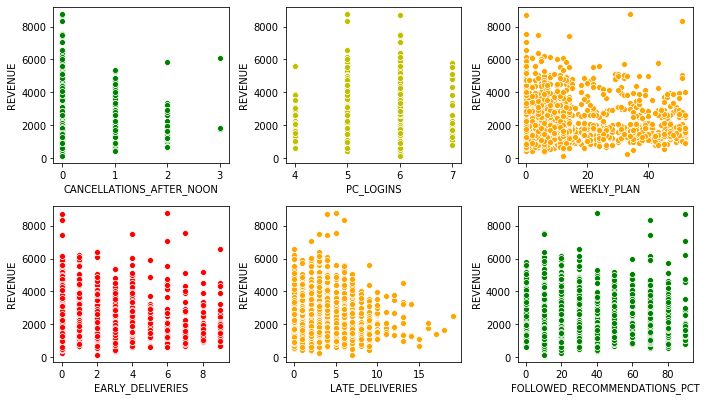

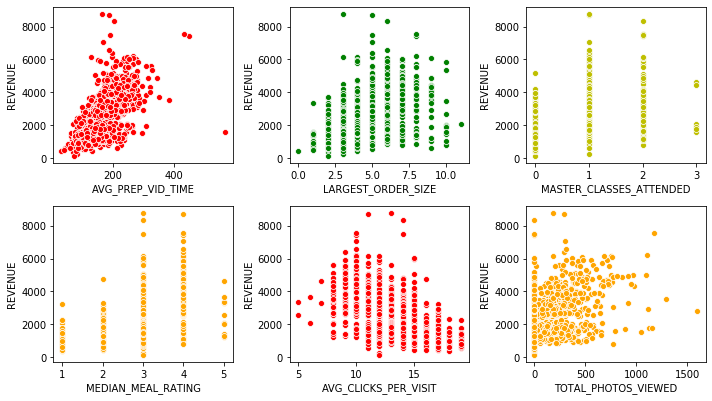

In [13]:
# scatter plots trend analyssi 
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(3, 3, 1)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'g')

########################

plt.subplot(3, 3, 2)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'y')

########################

plt.subplot(3, 3, 3)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'orange')

########################
plt.subplot(3, 3, 4)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'r')

#######################
plt.subplot(3, 3, 5)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'orange')

########################
plt.subplot(3, 3, 6)
sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['REVENUE'],
                color = 'r')

plt.tight_layout()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(3, 3, 1)
sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['REVENUE'],
                color = 'g')

########################

plt.subplot(3, 3, 2)
sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'y')

########################

plt.subplot(3, 3, 3)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'orange')

########################
plt.subplot(3, 3, 4)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'r')

#######################
plt.subplot(3, 3, 5)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'orange')

########################

plt.subplot(3, 3, 6)
sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['REVENUE'],
                color = 'g')

plt.tight_layout()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(3, 3, 1)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'r')


########################

plt.subplot(3, 3, 2)
sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'g')

########################

plt.subplot(3, 3, 3)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['REVENUE'],
                color = 'y')

########################
plt.subplot(3, 3, 4)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'orange')

#######################
plt.subplot(3, 3, 5)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'r')


######################
plt.subplot(3, 3, 6)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'orange')

plt.tight_layout()
########################

In [14]:
# Setting thresholds for features
TOTAL_MEALS_ORDERED_hi           = 200        # plots begin to scatter
CONTACTS_W_CUSTOMER_SERVICE_hi   = 9          # plots begin to scatter
AVG_TIME_PER_SITE_VISIT_hi       = 200        # plots begin to scatter  
LATE_DELIVERIES_hi               = 9          # plots begin to scatter
AVG_PREP_VID_TIME_hi             = 225        # plots begin to scatter

MASTER_CLASSES_ATTENDED_at       = 1          # one inflated
UNIQUE_MEALS_PURCH_at            = 0          # zero inflated  
CANCELLATIONS_AFTER_NOON_at      = 0          # zero inflated          
WEEKLY_PLAN_at                   = 0          # zero inflated  
MEDIAN_MEAL_RATING_at            = 3          # three inflated      
TOTAL_PHOTOS_VIEWED_at           = 0          # zero inflated                

We want to set these threshold to make sure we are accounting for any patterns in our customer's behavior. Making sure we cut any abnormal changes before they can skew our model performance. Following similar steps from previous examples, we will no build new features based on the threshold above - tagging either a 0 or 1 depending if the threshold boundary is met.

In [15]:
###########################################
## Feature Engineering (trends thresholds)
###########################################


# total meals ordered
original_df['tre_TOTAL_MEALS_ORDERED'] = 0
total_hi = original_df.loc[0:,'tre_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['tre_TOTAL_MEALS_ORDERED'].replace(to_replace = total_hi,
                                value      = 1,
                                inplace    = True)

# unique meals purchase
original_df['tre_UNIQUE_MEALS_PURCH'] = 0
unique_hi = original_df.loc[0:,"tre_UNIQUE_MEALS_PURCH"][original_df['UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURCH_at]

original_df['tre_UNIQUE_MEALS_PURCH'].replace(to_replace = unique_hi,
                                    value = 1,
                                    inplace = True)

# customer service contacts
original_df['tre_CONTACTS_W_CUSTOMER_SERVICE'] = 0
customer_service_hi = original_df.loc[0:,"tre_CONTACTS_W_CUSTOMER_SERVICE"][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_df['tre_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = customer_service_hi,
                                    value = 1,
                                    inplace = True)

# after noon cancels
original_df['tre_CANCELLATIONS_AFTER_NOON'] = 0
after_noon_hi = original_df.loc[0:,"tre_CANCELLATIONS_AFTER_NOON"][original_df['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_at]

original_df['tre_CANCELLATIONS_AFTER_NOON'].replace(to_replace = after_noon_hi,
                                    value = 1,
                                    inplace = True)

# weekly plan
original_df['tre_WEEKLY_PLAN'] = 0
weekly_hi = original_df.loc[0:,"tre_WEEKLY_PLAN"][original_df['WEEKLY_PLAN'] == WEEKLY_PLAN_at]

original_df['tre_WEEKLY_PLAN'].replace(to_replace = weekly_hi,
                                    value = 1,
                                    inplace = True)

# late delivery
original_df['tre_LATE_DELIVERIES'] = 0
late_hi = original_df.loc[0:,"tre_LATE_DELIVERIES"][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['tre_LATE_DELIVERIES'].replace(to_replace = late_hi,
                                    value = 1,
                                    inplace = True)

# avergae video time
original_df['tre_AVG_PREP_VID_TIME'] = 0
avg_video_hi = original_df.loc[0:,"tre_AVG_PREP_VID_TIME"][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['tre_AVG_PREP_VID_TIME'].replace(to_replace = avg_video_hi,
                                    value = 1,
                                    inplace = True)

# master classess attended
original_df['tre_MASTER_CLASSES_ATTENDED'] = 0
master_hi = original_df.loc[0:,"tre_MASTER_CLASSES_ATTENDED"][original_df['MASTER_CLASSES_ATTENDED'] == MASTER_CLASSES_ATTENDED_at]

original_df['tre_MASTER_CLASSES_ATTENDED'].replace(to_replace = master_hi,
                                    value = 1,
                                    inplace = True)

# meal rating
original_df['tre_MEDIAN_MEAL_RATING'] = 0
rating_hi = original_df.loc[0:,"tre_MEDIAN_MEAL_RATING"][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_at]

original_df['tre_MEDIAN_MEAL_RATING'].replace(to_replace = rating_hi,
                                    value = 1,
                                    inplace = True)

# total photos viewed
original_df['tre_TOTAL_PHOTOS_VIEWED'] = 0
photos_hi = original_df.loc[0:,"tre_TOTAL_PHOTOS_VIEWED"][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_at]

original_df['tre_TOTAL_PHOTOS_VIEWED'].replace(to_replace = photos_hi,
                                    value = 1,
                                    inplace = True)

The new threshold columns will be tagged with the format "tre_column_name"

Example:

    tre_LATE_DELIVERIES
    
Let's check the new columns are inputed.

In [16]:
# original_df.columns

We can see all the columns have been saved correctly.

----------------------------------------------

## Feature - Email Grouping
The dataset provides us with customer emails, and the types of emails per group. Within the case it states that there are 3 email groups.

    1. personal
    2. professional
    3. junk
    
To isolate whether or not an email is in this group we will need to split each email from the address and domain name. The goal is to have a single column that categorizes the emails by personal, professional and junk. To obtain this we will need to do the following:

    1. split email address
    2. group and classify email type
    3. create a new column

In [17]:
# Splitting emails
email_list = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    email_split = original_df.loc[index, 'EMAIL'].split(sep = "@")
    
    # add for loop results to list
    email_list.append(email_split)
    
# converting into a DataFrame 
email_df = pd.DataFrame(email_list)

# renaming columns
email_df.columns = ['name' , 'EMAIL_DOMAIN']

# concat email to df
original_df = pd.concat([original_df, email_df['EMAIL_DOMAIN']],
                   axis = 1)

# email domains
personal_emails = [ 'gmail.com','protonmail.com', 'yahoo.com', 'msn.com']
 
professional_emails = [ 'amex.com','merck.com', 'mcdonalds.com','cocacola.com','jnj.com','nike.com', 'apple.com',            
                        'ibm.com', 'ge.org','dupont.com','microsoft.com','chevron.com','unitedhealth.com',
                        'travelers.com', 'exxon.com','boeing.com','verizon.com','mmm.com','pg.com','caterpillar.com',
                        'disney.com','walmart.com','visa.com','pfizer.com','jpmorgan.com', 'unitedtech.com',
                       'cisco.com','goldmansacs.com','intel.com','homedepot.com']   

jumk_emails = ['me.com', 'aol.com','hotmail.com', 'live.com', 'msn.com','passport.com' ]


domain_list = []

for domain in original_df['EMAIL_DOMAIN']:
    
    # crete lists for personal
    if domain in personal_emails:
        domain_list.append("personal") # categorical list
        
    elif domain in professional_emails:
        domain_list.append("professional") # categorical list

    elif domain in jumk_emails:
        domain_list.append("junk") # categorical list    
        
    else:
        print(domain)

# create new series for domain type
original_df['DOMAIN_TYPE'] = pd.Series(domain_list)

## Feature - Dummy Variables
Once we get the grouped emails, we will pass in the get_dummies function. The get dummies will build features based on the groups, by tagging binary variables to them if they meet the conditions. We also dropped the columns we will not be using for the analysis, including:

    - NAME
    - EMAIL
    - FAMILY_NAME
    - FIRST_NAME
    - EMAIL_DOMAIN (we don't need this since we got the dummies)
    - DOMAIN_TYPE  (we don't need this since we got the dummies)

In [18]:
# one hot emails
one_hot_email             = pd.get_dummies(original_df['DOMAIN_TYPE'])

# joining codings together
original_df = original_df.join([one_hot_email],
              sort=False)

original_df = original_df.drop(['NAME','EMAIL','FAMILY_NAME', 
             'FIRST_NAME', 'EMAIL_DOMAIN', 'DOMAIN_TYPE'],
             axis = 1)

Now we have our email dummy variables we can move forward with saving our features.

------------------------------------------------------------------- 

## Saving Features

We have prepared all our features and are prepared to build the model. To ensure we have our results saved we will save the results into an external excel file and inspect the dataframe.

In [19]:
# original_df.info()

In [49]:
# original_df.to_excel('features_apprentice_chef.xlsx',
#                  index = False)

- Our final output has 65 columns, which is more than double of our original column length.
- There are no columns with missing values
- We have our 4 main new feature groups
    
        1. log feature
        2. outlier feature
        3. threshold feature
        4. email feature
        
Next we can move forward with building the model to be used and determine how well our features perform.

# 3. Model Building

## Stats Model
In this step we will build a model using the statsmodel package. The goal of this is to identify the variables with the highest p-values so we can manually remove them and help optimize the model. If we don't do this step, and we look to build models using scikit learn later, redundant variables will be kept and will slow the model down.

In [21]:
# import statsmodels.formula.api as smf
# from sklearn.model_selection import train_test_split

#### Training and Testing Set

In [22]:
# # drop remaining categorical variables - creating the features
# customer_data = original_df.drop(['REVENUE'], 
#                          axis = 1)

# # drop remaining categorical variables - creating the y variable
# customer_target = original_df["REVENUE"].transform(np.log)                       

# # preparing training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#             customer_data,
#             customer_target,
#             test_size = 0.25,
#             random_state = 222)

In [23]:
# # make explantory variable set
# df_explanatory = original_df.copy()


# # drop unecessary columns
# df_explanatory = original_df.drop('REVENUE', axis = 1)


# for val in df_explanatory:
#     print(f"customer_train['{val}'] +")

#### Variables
For the first model we will build we will pass in all the variables we were given plus the new features we developed. This will allow us to get an overview of the model without any changes at first.

In [24]:
# #linear model
# customer_train = pd.concat([X_train,y_train], axis = 1)

# linear_model = smf.ols(formula = """REVENUE ~ 
#                                     customer_train['CROSS_SELL_SUCCESS'] +
#                                     customer_train['TOTAL_MEALS_ORDERED'] +
#                                     customer_train['UNIQUE_MEALS_PURCH'] +
#                                     customer_train['CONTACTS_W_CUSTOMER_SERVICE'] +
#                                     customer_train['PRODUCT_CATEGORIES_VIEWED'] +
#                                     customer_train['AVG_TIME_PER_SITE_VISIT'] +
#                                     customer_train['MOBILE_NUMBER'] +
#                                     customer_train['CANCELLATIONS_BEFORE_NOON'] +
#                                     customer_train['CANCELLATIONS_AFTER_NOON'] +
#                                     customer_train['TASTES_AND_PREFERENCES'] +
#                                     customer_train['PC_LOGINS'] +
#                                     customer_train['MOBILE_LOGINS'] +
#                                     customer_train['WEEKLY_PLAN'] +
#                                     customer_train['EARLY_DELIVERIES'] +
#                                     customer_train['LATE_DELIVERIES'] +
#                                     customer_train['PACKAGE_LOCKER'] +
#                                     customer_train['REFRIGERATED_LOCKER'] +
#                                     customer_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
#                                     customer_train['AVG_PREP_VID_TIME'] +
#                                     customer_train['LARGEST_ORDER_SIZE'] +
#                                     customer_train['MASTER_CLASSES_ATTENDED'] +
#                                     customer_train['MEDIAN_MEAL_RATING'] +
#                                     customer_train['AVG_CLICKS_PER_VISIT'] +
#                                     customer_train['TOTAL_PHOTOS_VIEWED'] +
#                                     customer_train['log_TOTAL_MEALS_ORDERED'] +
#                                     customer_train['log_UNIQUE_MEALS_PURCH'] +
#                                     customer_train['log_CONTACTS_W_CUSTOMER_SERVICE'] +
#                                     customer_train['log_PRODUCT_CATEGORIES_VIEWED'] +
#                                     customer_train['log_AVG_TIME_PER_SITE_VISIT'] +
#                                     customer_train['log_PC_LOGINS'] +
#                                     customer_train['log_AVG_PREP_VID_TIME'] +
#                                     customer_train['log_MEDIAN_MEAL_RATING'] +
#                                     customer_train['log_AVG_CLICKS_PER_VISIT'] +
#                                     customer_train['out_TOTAL_MEALS_ORDERED'] +
#                                     customer_train['out_UNIQUE_MEALS_PURCH'] +
#                                     customer_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
#                                     customer_train['out_PRODUCT_CATEGORIES_VIEWED'] +
#                                     customer_train['out_AVG_TIME_PER_SITE_VISIT'] +
#                                     customer_train['out_CANCELLATIONS_BEFORE_NOON'] +
#                                     customer_train['out_CANCELLATIONS_AFTER_NOON'] +
#                                     customer_train['out_PC_LOGINS'] +
#                                     customer_train['out_WEEKLY_PLAN'] +
#                                     customer_train['out_EARLY_DELIVERIES'] +
#                                     customer_train['out_LATE_DELIVERIES'] +
#                                     customer_train['out_AVG_PREP_VID_TIME'] +
#                                     customer_train['out_LARGEST_ORDER_SIZE'] +
#                                     customer_train['out_MASTER_CLASSES_ATTENDED'] +
#                                     customer_train['out_MEDIAN_MEAL_RATING'] +
#                                     customer_train['out_AVG_CLICKS_PER_VISIT'] +
#                                     customer_train['out_TOTAL_PHOTOS_VIEWED'] +
#                                     customer_train['tre_TOTAL_MEALS_ORDERED'] +
#                                     customer_train['tre_UNIQUE_MEALS_PURCH'] +
#                                     customer_train['tre_CONTACTS_W_CUSTOMER_SERVICE'] +
#                                     customer_train['tre_CANCELLATIONS_AFTER_NOON'] +
#                                     customer_train['tre_WEEKLY_PLAN'] +
#                                     customer_train['tre_LATE_DELIVERIES'] +
#                                     customer_train['tre_AVG_PREP_VID_TIME'] +
#                                     customer_train['tre_MASTER_CLASSES_ATTENDED'] +
#                                     customer_train['tre_MEDIAN_MEAL_RATING'] +
#                                     customer_train['tre_TOTAL_PHOTOS_VIEWED'] +
#                                     customer_train['junk'] +
#                                     customer_train['personal'] +
#                                     customer_train['professional']
# """,
#                                     data = customer_train)

# train_result = linear_model.fit()
# print(train_result.summary())

### Regression Results

Stat | Score |
---|---|
 R-squared:               |        0.811
 Adj. R-squared:          |        0.803
 F-statistic:             |        101.6
 Prob (F-statistic):      |         0.00
 Log-Likelihood:          |       207.93
 AIC:                     |       -295.9
 BIC:                     |        21.28
 
 
### First few rows

Variable                                       |         coef   | std err    |      t   |   P> t  |    0.025    |  0.975|
-----------------------------|----------------|----------------------|------------|-----------|------------|------------|
Intercept                                          |   3.7070   |   2.002   |   1.852   |   0.064    |  -0.220   |    7.634
customer_train['CROSS_SELL_SUCCESS']               |  -0.0238   |   0.015   |  -1.619   |   0.106    |  -0.053   |    0.005
customer_train['TOTAL_MEALS_ORDERED']              |  -0.0040   |   0.000   |  -8.771   |   0.000    |  -0.005   |   -0.003
customer_train['UNIQUE_MEALS_PURCH']|0.1443   |   0.009   |  16.061   |   0.000    |   0.127   |    0.162
customer_train['CONTACTS_W_CUSTOMER_SERVICE']      |   0.0397   |   0.019   |   2.075   |   0.038   |    0.002   |    0.077
customer_train['PRODUCT_CATEGORIES_VIEWED']        |   0.0454   |   0.016   |   2.892   |   0.004   |    0.015   |    0.076
customer_train['AVG_TIME_PER_SITE_VISIT']          |  -0.0002   |   0.000   |  -0.591   |   0.555   |   -0.001   |    0.000
customer_train['MOBILE_NUMBER']                   |   -0.0012   |   0.018|-0.068   |   0.946   |   -0.036    |   0.033
customer_train['CANCELLATIONS_BEFORE_NOON']       |    0.0062   |   0.006   |   1.089   |   0.276   |   -0.005    |   0.017
customer_train['CANCELLATIONS_AFTER_NOON']        |    0.0415   |   0.037   |   1.130   |   0.259    |  -0.031    |   0.114
customer_train['TASTES_AND_PREFERENCES']          |    0.0119   |   0.013   |   0.946   |   0.344   |   -0.013    |   0.036


### Overview
Looking at this model, when we pass in all our new and old features we get a relatively high R-squared at 0.811, but we can see we have a lot of variables that have a p-value higher than 0.05. In general we want to reject variables that fall above this threshold. Lower than or equal to 0.05 mean's the variables are statistically significant for our model's performance and if we were to remove one we could significantly alter the results. However, we cannot base that if we do remove all p-value that are higher than 0.05 our model will be sound. Removing the high p-values would only give us addtional support to improve and continue to develop the model (Source: [Mcleod (2019) Simply Psychology](https://www.simplypsychology.org/p-value.html))

Along with the p-values we see there are numerous coefficients with negative values. The coefficient tells us that for every unit increase in that variable the change will follow suit. For example we see 'out_CANCELLATIONS_AFTER_NOON' have a 1.8141 coefficient, since this feature is an OUTLIER feature we can determine that if there is a change in positive 1 in the CANCELLATIONS_AFTER_NOON and the change meets the threshold set for the OUTLIER the overall value of REVENUE will increase by 1.8141, therefore having a positive impact on the response variable. (Source: [Princeton](https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm))
 
## Removing p-values
Below we will remove the flagged p-values one by one if they have a higher than 0.05 value, and run the model again. Our goal is to narrow down the features. The reason we remove one p-value at a time is because if we decided to remove all the high values simultaneously it may effect other variables. So we must remove one by one, then observe the changes, then proceed to remove - this ensures our results remain in tack and will not cause any skewed performance. (Source: [Minitab](https://blog.minitab.com/blog/understanding-statistics/three-common-p-value-mistakes-youll-never-have-to-make)).

In [25]:
# # updated linear model
# customer_train = pd.concat([X_train,y_train], axis = 1)

# linear_model = smf.ols(formula = """REVENUE ~ 
#                                     customer_train['TOTAL_MEALS_ORDERED'] +
#                                     customer_train['UNIQUE_MEALS_PURCH'] +
#                                     customer_train['CONTACTS_W_CUSTOMER_SERVICE'] +
#                                     customer_train['PRODUCT_CATEGORIES_VIEWED'] +                                   
#                                     customer_train['EARLY_DELIVERIES'] +
#                                     customer_train['LARGEST_ORDER_SIZE'] +
#                                     customer_train['MASTER_CLASSES_ATTENDED'] +
#                                     customer_train['MEDIAN_MEAL_RATING'] +
#                                     customer_train['log_TOTAL_MEALS_ORDERED'] +
#                                     customer_train['log_UNIQUE_MEALS_PURCH'] +
#                                     customer_train['log_PRODUCT_CATEGORIES_VIEWED'] +
#                                     customer_train['log_AVG_PREP_VID_TIME'] +
#                                     customer_train['log_MEDIAN_MEAL_RATING'] +
#                                     customer_train['out_TOTAL_MEALS_ORDERED'] +
#                                     customer_train['out_UNIQUE_MEALS_PURCH'] +
#                                     customer_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
#                                     customer_train['out_CANCELLATIONS_AFTER_NOON'] +
#                                     customer_train['out_AVG_PREP_VID_TIME'] +
#                                     customer_train['out_MASTER_CLASSES_ATTENDED'] +
#                                     customer_train['out_MEDIAN_MEAL_RATING'] +
#                                     customer_train['out_TOTAL_PHOTOS_VIEWED'] +
#                                     customer_train['tre_TOTAL_MEALS_ORDERED'] +
#                                     customer_train['tre_CONTACTS_W_CUSTOMER_SERVICE'] +
#                                     customer_train['tre_CANCELLATIONS_AFTER_NOON'] +
#                                     customer_train['tre_MASTER_CLASSES_ATTENDED'] +
#                                     customer_train['tre_MEDIAN_MEAL_RATING'] +
#                                     customer_train['junk'] +
#                                     customer_train['personal'] +
#                                     customer_train['professional']
# """,
#                                     data = customer_train)

# train_result = linear_model.fit()
# print(train_result.summary())

### Updated Regression Results

Stat | Score |
---|---|
 R-squared:               |        0.807
 Adj. R-squared:          |        0.803
 F-statistic:             |        229.7
 Prob (F-statistic):      |         0.00
 Log-Likelihood:          |       192.03
 AIC:                     |       -330.1
 BIC:                     |        -1874.4
 
 
### First few rows with updated p-values


Variables                                        |            coef |   std err   |      t   |   P > t   |   0.025  |    0.975|
-----------------------------|---|----|---|----|----|-------------------------------|
Intercept                                           |  1.9725   |   0.113   |  17.492  |    0.000  |     1.751   |    2.194
customer_train['TOTAL_MEALS_ORDERED']               | -0.0039   |   0.000  |   -8.641  |    0.000  |    -0.005   |   -0.003
customer_train['UNIQUE_MEALS_PURCH']                |  0.1417   |   0.009   |  16.319  |    0.000  |     0.125   |    0.159
customer_train['CONTACTS_W_CUSTOMER_SERVICE']       |  0.0334   |   0.004   |   8.199  |    0.000   |    0.025   |    0.041
customer_train['PRODUCT_CATEGORIES_VIEWED']         |  0.0207   |   0.006   |   3.206  |    0.001   |    0.008   |    0.033
customer_train['EARLY_DELIVERIES']                  | -0.0054   |   0.002   |  -2.178  |    0.030   |   -0.010   |   -0.001
customer_train['LARGEST_ORDER_SIZE']                | -0.0393   |   0.006   |  -6.097  |    0.000   |   -0.052    |  -0.027
customer_train['MASTER_CLASSES_ATTENDED']           | -0.2068  |    0.099   |  -2.088  |    0.037  |    -0.401    |  -0.013
customer_train['MEDIAN_MEAL_RATING']                | -0.4338  |    0.111   |  -3.917  |   0.000    |  -0.651     | -0.217
customer_train['log_TOTAL_MEALS_ORDERED']           |  0.4863   |   0.032   |  15.379   |   0.000   |    0.424    |   0.548
customer_train['log_UNIQUE_MEALS_PURCH']           |  -0.6691   |   0.031   | -21.345   |   0.000|-0.731    |  -0.608
customer_train['log_PRODUCT_CATEGORIES_VIEWED']     | -0.0868   |   0.028   |  -3.133   |   0.002    |  -0.141    |  -0.032

### Overview
We can in the first few rows above we don't have any variable which have over 0.05 so we have ensured all statistically significant variables are kept. This is important, because we will look to keep all these variables when we build the scikit models in the following steps. Scikit learn does not account high or low p-values, so this extra step is helping optimizing the data before training and testing the model.


----------------------------------------------------------------------

# Sci Kit Learn

## Train/Test Split
As stated earlier, the company want to know how much revenue a customer will bring the company in the first year. To achieve that we will need to build a training and testing set to optimize the performance of the model. A training set, is a portion of the dataset exclusive used to training and teach a model. In comparison the test set, is used as the sample to respond to the training model's performance.

Using Sci-kit learn we will split the dataset with 75% for training and 25% for testing. We will also set a seed at 222, which will allow us the ability for reproducibility of the same test/train split further down the line and for future purposes.

With our dataset already prepared we also want to define the response variable "REVENUE" as it's out series, and have the remaining features as part of the X variables - creating a target and response variable. In order to address the spread of the REVENUE variable we will be taking the log of REVENUE.

In [26]:
#import scikit learn linear

import sklearn.linear_model
from sklearn.model_selection import train_test_split

### Remove High p-values from Stats Model
Given that in the Stats model step, we removed a lot of variables we want to replicate this in sci kit learn to ensure we don't have any redundant variables in the model.

In [27]:
# defining x_variables that we kept from the Stats model

x_variables = [           'TOTAL_MEALS_ORDERED',
                          'UNIQUE_MEALS_PURCH',
                          'CONTACTS_W_CUSTOMER_SERVICE',
                          'PRODUCT_CATEGORIES_VIEWED',                                   
                          'EARLY_DELIVERIES',
                          'LARGEST_ORDER_SIZE',
                          'MASTER_CLASSES_ATTENDED',
                          'MEDIAN_MEAL_RATING',
                          'log_TOTAL_MEALS_ORDERED',
                          'log_UNIQUE_MEALS_PURCH',
                          'log_PRODUCT_CATEGORIES_VIEWED',
                          'log_AVG_PREP_VID_TIME',
                          'log_MEDIAN_MEAL_RATING',
                          'out_TOTAL_MEALS_ORDERED',
                          'out_UNIQUE_MEALS_PURCH',
                          'out_CONTACTS_W_CUSTOMER_SERVICE',
                          'out_CANCELLATIONS_AFTER_NOON',
                          'out_AVG_PREP_VID_TIME',
                          'out_MASTER_CLASSES_ATTENDED',
                          'out_MEDIAN_MEAL_RATING',
                          'out_TOTAL_PHOTOS_VIEWED',
                          'tre_TOTAL_MEALS_ORDERED',
                          'tre_CONTACTS_W_CUSTOMER_SERVICE',
                          'tre_CANCELLATIONS_AFTER_NOON',
                          'tre_MASTER_CLASSES_ATTENDED',
                          'tre_MEDIAN_MEAL_RATING',
                          'junk',
                          'personal',
                          'professional']

In [28]:
# drop remaining categorical variables - creating the features
customer_data = original_df.loc[:, x_variables]

# drop remaining categorical variables - creating the y variable
customer_target = original_df["REVENUE"].transform(np.log)                       

# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            customer_data,
            customer_target,
            test_size = 0.25,
            random_state = 222)

## Models
To get the best results I will build several models to identify which model performs the best based on the features we have created. Each model has their own benefits, so it is important to identify how small impacts effects the results.

    1. Linear Regression
    2. Ridge Regression
    3. Lasso Regression
    4. ARD Regression
    5. Gradient Boosting

##  Ordinary Least Squares (OLS)  Model
Ordinary Least Squares regression is one of the more common practices for modeling, and it studies the relationship from the X variables and how ti affects the values y - in our case REVENUE. This model is a good starting point to see how it performs and see if there is anywhere that needs to be pivoted to obtain a higher performing model based on the features.

OLS is not the only optimization strategy, it is the most popular for this kind of tasks, since the outputs of the regression (that are, coefficients) are unbiased estimators of the real values. (Source: [Alto, V. (2019) - Towards Data Science](https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc))

In [29]:
# # Create the regressor: reg_all
# reg_all = sklearn.linear_model.LinearRegression()

# # Fit the regressor to the training data
# model = reg_all.fit(X_train, y_train)

# # Predict on the test data: y_pred
# y_pred = reg_all.predict(X_test)

# # check scores
# print('Regression Training Score:', reg_all.score(X_train, y_train).round(4))
# print('Regression Testing Score:', reg_all.score(X_test, y_test).round(4))

# regression_train = reg_all.score(X_train, y_train).round(4)
# regression_test = reg_all.score(X_test, y_test).round(4)

    Regression Training Score: 0.8066
    Regression Testing Score: 0.7693

## Ridge Model
Ridge regression is a regression model that works to reduce the size of the coefficients, which reduces the complexity and multi-collinearity with the predictor variables. The purpose of Ridge regression is to monitor how predictor variables are correlated.

The predictor variable does not reflect any inherent effect of that particular predictor on the response variable, but only a marginal or partial effect, given whatever other correlated predictor variables are included in the model. Ridge regression adds a small bias factor to the variables in order to alleviate this problem. (Source: [Stack Exchange](https://stats.stackexchange.com/questions/52653/what-is-ridge-regression))

In [30]:
# # instantiatie ridge
# ridge = sklearn.linear_model.Ridge()


# # fit ridge
# ridge_fit  = ridge.fit(X_train, y_train)


# #  Predit ridge
# ridge_pred = ridge_fit.predict(X_test)


# print('Ridge Training Score:', ridge.score(X_train, y_train).round(4))
# print('Ridge Testing Score:',  ridge.score(X_test, y_test).round(4))


# # save results
# ridge_train_score = ridge.score(X_train, y_train).round(4)
# ridge_test_score  = ridge.score(X_test, y_test).round(4)

    Ridge Training Score: 0.8052
    Ridge Testing Score: 0.7648

## Lasso Model
Lasso regression is a regression model that helps reduce the chances of over fitting. It also is a good model technique to improve feature engineering selection and optimization. Lasso regression focuses on shrinking the variables closer to a set value for example mean. In this case the Lasso model would not be best fit, since we are already utilizing log values on some X variables and the revenue response, as a result we can expect the Lasso model to perform relatively poor. 

To get a better understanding on it's comparison we will run this model just to have it as a benchmark comparison value later on.

In [31]:
# # instantiate lasso
# lasso = sklearn.linear_model.Lasso()

# # fit lasso
# lasso_fit = lasso.fit(X_train, y_train)


# # predict lasso
# lasso_pred = lasso_fit.predict(X_test)

# print('Lasso Training Score:', lasso.score(X_train, y_train).round(4))
# print('Lasso Testing Score:',  lasso.score(X_test, y_test).round(4))


# # saving results
# lasso_train_score = lasso.score(X_train, y_train).round(4)
# lasso_test_score  = lasso.score(X_test, y_test).round(4)

    Lasso Training Score: 0.3726
    Lasso Testing Score: 0.3551

## ARD Regression
The ARD regression model follows a similar process to ordinary least squared regression, but shifts it's variables closer to 0. This allows it to stabilize the values and provide results that closely follow a Gaussian distribution. 

In [32]:
# # instantiate ARD
# ard_model = sklearn.linear_model.ARDRegression()


# # fit ARD
# ard_fit = ard_model.fit(X_train, y_train.values.ravel())


# # predict ARD
# ard_pred = ard_fit.predict(X_test)


# print('ARD Training Score:', ard_model.score(X_train,y_train).round(4))
# print('ARD Testing Score:',  ard_model.score(X_test,y_test).round(4))


# # save ard results
# ard_train_score = ard_model.score(X_train,y_train).round(4)
# ard_test_score  = ard_model.score(X_test,y_test).round(4)

    ARD Training Score: 0.7949
    ARD Testing Score: 0.7603

# Gradient Boosting
Gradient Boosting trains many models in a step by step process. Gradient boosting focuses on building smaller models over an over again, depending on the limits set to create one overall model. The main advantage of gradient boosting is continually test, and find ways to work around weak performing models making it more robust. Building on an iterative process helps produce an overall strong model. However this process can take longer than normal depending on how many iterations are set.

<i>"The predictive power of these individual models is weak and prone to overfitting but combining many such weak models in an ensemble will lead to an overall much improved result"  </i> - [Elsinghorst (2018) - Shirin's Playground](https://shirinsplayground.netlify.com/2018/11/ml_basics_gbm/)

In [33]:
# gradient
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score

gb_model = sklearn.ensemble.GradientBoostingRegressor()

# FITTING the training data
gb_fit = gb_model.fit(X_train,y_train)


# PREDICTING on new data
gb_pred = gb_model.predict(X_test)


# saving scoring data for future use
gb_train_score = cross_val_score(gb_model,
                             X_train,
                             y_train,
                             scoring = 'r2',
                             cv=10,
                             n_jobs =-1).mean().round(3)

gb_test_score = cross_val_score(gb_model,
                             X_test,
                             y_test,
                             scoring = 'r2',
                             cv=10,
                             n_jobs =-1).mean().round(3)

print(f'GB Training Score: {gb_train_score}')
print(f'GB Testing Score: {gb_test_score}')

GB Training Score: 0.838
GB Testing Score: 0.803


# Overall Regression Performance Comparison
Now we have all our models, we want to ensure we have a side by side comparison to determine best performer.

In [34]:
# # comparing results

# print(f"""
# Model      Train Score      Test Score
# -----      -----------      ----------
# OLS        {regression_train}           {regression_test}
# Ridge      {ridge_train_score}           {ridge_test_score}
# Lasso      {lasso_train_score}           {lasso_test_score}
# ARD        {ard_train_score}           {ard_test_score}
# GB         {gb_train_score}             {gb_test_score}
# """)


# # creating a dictionary for model results
# model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso','ARD', "GB"],
           
#                      'Training' : [regression_train, ridge_train_score,
#                                    lasso_train_score, ard_train_score,
#                                   gb_train_score],
           
#                      'Testing'  : [regression_test, ridge_test_score,
#                                    lasso_test_score, ard_test_score,
#                                   gb_test_score]}
                                   


# # converting model_performance into a DataFrame
# model_performance = pd.DataFrame(model_performance)


# # sending model results to Excel
# model_performance.to_excel('regression_model_performance.xlsx',
#                            index = False)


Model|      Train Score    |  Test Score
-----   |   -----------  |    ----------
OLS      |  0.8066       |    0.7693
Ridge    |  0.8052       |    0.7648
Lasso     | 0.3726       |    0.3551
ARD      |  0.7949       |    0.7603
GB       |  0.839       |   0.802

# K-Nearest Neighbors and Distance Standardization
KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors. The data is assigned to the class which has the nearest neighbors. As you increase the number of nearest neighbors, the value of k, accuracy might increase. The goal of using KNN is to find clusters of groups that meet certain characteristics. Source: [Srivastava (2019) - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)

In [35]:
# # new libraries
# from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
# from sklearn.preprocessing import StandardScaler # standard scaler


# performance_file = "regression_model_performance.xlsx"

# performance = pd.read_excel(performance_file)

In [36]:
# # drop remaining categorical variables - creating the features
# customer_data = original_df.loc[:, x_variables]

# # drop remaining categorical variables - creating the y variable
# customer_target = original_df["REVENUE"]                       

# # preparing training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#             customer_data,
#             customer_target,
#             test_size = 0.25,
#             random_state = 222)

## Standardization
Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

In [37]:
# # instantiate scaler
# scaler = StandardScaler()

# # fit it
# scaler.fit(customer_data)

# # transform data
# X_scaled = scaler.transform(customer_data)

# # convert into dataframe
# X_scaled_df = pd.DataFrame(X_scaled)

### Checking Results
We can observe if our standarization process worked below by comparing the correlation of the non standardized and standardized variables below.

In [38]:
# # adding labels to the scaled DataFrame
# X_scaled_df.columns = customer_data.columns

# #  Checking pre- and post-scaling of the data
# print(f"""
# Dataset BEFORE Scaling
# ----------------------
# {pd.np.var(customer_data)}


# Dataset AFTER Scaling
# ----------------------
# {pd.np.var(X_scaled_df)}
# """)

In [39]:
# ##############################################################################
# # Unscaled Dataset
# ##############################################################################

# # subsetting the original dataset
# customer_subset = customer_data.loc[ : , ['TOTAL_MEALS_ORDERED',
#                                         'UNIQUE_MEALS_PURCH',
#                                         'AVG_TIME_PER_SITE_VISIT',
#                                         'WEEKLY_PLAN',
#                                         'LARGEST_ORDER_SIZE',
#                                         'AVG_PREP_VID_TIME']]


# # UNSCALED correlation matrix
# df_corr = customer_subset.corr().round(2)


# # setting figure size and plot window
# fig, ax = plt.subplots(figsize = (16, 16))
# plt.subplot(1, 2, 1)


# # heatmap of UNSCALED correlations
# sns.heatmap(df_corr,
#             cmap = 'coolwarm',
#             square = True,
#             annot = True,
#             cbar = False) # surpressing the color bar)



# ##############################################################################
# # Scaled Dataset
# ##############################################################################

# # SCALED correlation matrix
# df_scaled_corr = X_scaled_df.loc[ : , ['TOTAL_MEALS_ORDERED',
#                                         'UNIQUE_MEALS_PURCH',
#                                         'AVG_TIME_PER_SITE_VISIT',
#                                         'WEEKLY_PLAN',
#                                         'LARGEST_ORDER_SIZE',
#                                         'AVG_PREP_VID_TIME']].corr().round(2)


# # titling the plot
# plt.title("BEFORE Standardization")


# # setting plot window
# plt.subplot(1, 2, 2)


# # heatmap of SCALED correlations
# sns.heatmap(df_scaled_corr,
#             cmap = 'coolwarm',
#             square = True,
#             annot = True,
#             cbar = False) # surpressing the color bar


# # titling the plot
# plt.title("AFTER Standardization")
# plt.savefig('Corrplots Before and After Scaling.png')
# plt.tight_layout()
# plt.show()

### Results
During this standardization process we can see that as we check the relationship and variables, there were not mistakes and the relationships were still in tack.

## KNN with Non Standardized Data

In [40]:
# #train and test 
# X_train, X_test, y_train, y_test = train_test_split(
#             customer_data,
#             customer_target,
#             test_size = 0.25,
#             random_state = 222)

In [41]:
# # creating lists for training set accuracy and test set accuracy
# training_accuracy = []
# test_accuracy = []


# # building a visualization of 1 to 50 neighbors
# neighbors_settings = range(1, 21)


# for n_neighbors in neighbors_settings:
#     # Building the model
#     clf = KNeighborsRegressor(n_neighbors = n_neighbors)
#     clf.fit(X_train, y_train)
    
#     # Recording the training set accuracy
#     training_accuracy.append(clf.score(X_train, y_train))
    
#     # Recording the generalization accuracy
#     test_accuracy.append(clf.score(X_test, y_test))


# # plotting the visualization
# fig, ax = plt.subplots(figsize=(12,8))
# plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
# plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()
# plt.show()


# # finding the optimal number of neighbors
# non_stand_opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
# print(f"""The optimal number of neighbors is {non_stand_opt_neighbors}""")

### Performance

In [42]:
# # INSTANTIATING a model with the optimal number of neighbors
# knn_non_stand = KNeighborsRegressor(algorithm = 'auto',
#                    n_neighbors = non_stand_opt_neighbors)


# # FITTING the model based on the training data
# knn_non_stand.fit(X_train, y_train)


# # PREDITCING on new data
# knn_non_stand_pred = knn_non_stand.predict(X_test)


# # SCORING the results
# print('Training Score:', knn_non_stand.score(X_train, y_train).round(4))
# print('Testing Score:',  knn_non_stand.score(X_test, y_test).round(4))


# # saving scoring data for future use
# knn_non_stand_score_train = knn_non_stand.score(X_train, y_train).round(4)
# knn_non_stand_score_test  = knn_non_stand.score(X_test, y_test).round(4)

        Training Score: 0.6204
        Testing Score: 0.4883

        The optimal number of neighbors is 9

## KNN with Standardized Data
Now we want to create a new train and test set using the scaled variables we build earlier and test the performance of the model.

In [43]:
# # new trainining set
# X_train, X_test, y_train, y_test= train_test_split(
#             X_scaled_df,
#             customer_target,
#             test_size = 0.25,
#             random_state = 222)

In [44]:
# # creating lists for training set accuracy and test set accuracy
# training_accuracy = []
# test_accuracy = []


# # building a visualization of 1 to 50 neighbors
# neighbors_settings = range(1, 21)


# for n_neighbors in neighbors_settings:
#     # Building the model
#     clf = KNeighborsRegressor(n_neighbors = n_neighbors)
#     clf.fit(X_train, y_train)
    
#     # Recording the training set accuracy
#     training_accuracy.append(clf.score(X_train, y_train))
    
#     # Recording the generalization accuracy
#     test_accuracy.append(clf.score(X_test, y_test))


# # plotting the visualization
# fig, ax = plt.subplots(figsize=(12,8))
# plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
# plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()
# plt.show()


# # finding the optimal number of neighbors
# stan_opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
# print(f"""The optimal number of neighbors is {stan_opt_neighbors}""")

### Performance

In [45]:
# # INSTANTIATING a model with the optimal number of neighbors
# knn_stand = KNeighborsRegressor(algorithm = 'auto',
#                    n_neighbors = stan_opt_neighbors)


# # FITTING the model based on the training data
# knn_stand.fit(X_train, y_train)


# # PREDITCING on new data
# knn_stand_pred = knn_stand.predict(X_test)


# # SCORING the results
# print('Training Score:', knn_stand.score(X_train, y_train).round(4))
# print('Testing Score:',  knn_stand.score(X_test, y_test).round(4))


# # saving scoring data for future use
# knn_stand_score_train = knn_stand.score(X_train, y_train).round(4)
# knn_stand_score_test  = knn_stand.score(X_test, y_test).round(4)

    Training Score: 0.6919
    Testing Score: 0.5851
    
    The optimal number of neighbors is 20

## Overall KNN Performance

In [46]:
# # comparing results

# print(f"""
# KNN Model             Neighbors     Train Score      Test Score
# ----------------      ---------     ----------       ----------
# Non-Standardized      {non_stand_opt_neighbors}              {knn_non_stand_score_train}           {knn_non_stand_score_test}
# Standardized          {stan_opt_neighbors}              {knn_stand_score_train}           {knn_stand_score_test}
# """)


# # creating a dictionary for model results
# knn_model_performance = {'Model'    : [f'KNN_NS_{non_stand_opt_neighbors}', f'KNN_S_{stan_opt_neighbors}'],
           
#                      'Training' : [knn_non_stand_score_train, knn_stand_score_train],
           
#                      'Testing'  : [knn_non_stand_score_test, knn_stand_score_test]}


KNN Model          |   Neighbors  |   Train Score   |   Test Score|
----------------    |  ---------   |  ----------     |  ----------|
Non-Standardized   |   9          |    0.6204       |   0.4883
Standardized       |   20        |      0.6919       |    0.5851

We can observe from the results that the standardized data requires more more neighbors to obtain a stronger model performance. However just glancing at these scores we already know that the KNN model is performing poorly and we will likely not use this further in the process.


----------------------------------------------------------

# 4. Model Performance
Merging results from all the models done in the entire project.

In [47]:
# # converting model_performance into a DataFrame
# knn_model_performance = pd.DataFrame(knn_model_performance)


# # concatenating with former performance DataFrame
# total_performance = pd.concat([performance, knn_model_performance],
#                               axis = 0)


# total_performance.sort_values(by = 'Testing',
#                               ascending = False)


# # sending model results to Excel
# total_performance.to_excel('all_model_performance.xlsx',
#                            index = False)

In [48]:
# file = 'all_model_performance.xlsx'

# overall_performance = pd.read_excel(file)

# overall_performance


Model|      Train Score    |  Test Score
-----   |   -----------  |    ----------
OLS      |  0.8066       |    0.7693
Ridge    |  0.8052       |    0.7648
Lasso     | 0.3726       |    0.3551
ARD      |  0.7949       |    0.7603
GB       |  0.839       |   0.802
KNN_NS_9 | 0.6204  | 0.4883
KNN_S_20 | 0.6919   | 0.5851


## Model Overview
For our results we can see the the best overall performing model is our Gradient Boosting with a testing set score of,

    •    Gradient Boosting Test Score of 0.802

As expected the Lasso model performed very poorly due to us already utilizing log variables, which would effect the results. We can see that the KNN models for both performed poorly. It is interesting to see that the KNN model with standardized variables perfomed almost 0.1 better than the KNN without standardized data. With this information we could test out different variations of parameter and feature tuning to try get this model competing with the other regression models.Overall the OLS, Ridge and ARD regression model all came close of one another, paving the way for more opportunities to develop features that would suit their respective model. 

Using Gradient Boosting, we were able to pass in a number for the CV argument allowing more iterations to be tested. After running this model with different variations of CV, the final number 10 deemed to be the most optimal to maintain a model run time of under 1 minute. Adjusting this further would require more computational power and may delay the performance. 


--------------------------------------------------------------

# 5. Project Overview

## Insight #1
We can see that a great metric for improving revenue was how much time a user spent watching videos. Through the analysis, there is a pattern when more time is spent viewing and learning how to prepare the meals, and it would also affect the amount of revenue a customer would bring into the company. Studying customer engagement and viewing how they respond to the video content will provide two avenues for growth - increased revenue and better user experience. They can assess the demand for the videos and cater to more personalized video solutions for their audience.

## Insight #2
Looking at a possible influence of the churn rate for the Apprentice customers, we can observe that when customers contact the support team, there is initially a positive association with revenue. However, we see there is a drastic shift in the relationship. When a customer spends more time contacting support, their revenue has a negative relationship. Increased contacts for support is most likely due to errors in the orders or a bad user experience, which is prompting users to reach out. We see the trigger point around ten contacts with the support team. A good strategy would be to monitor the frequency of users communicating to make sure to mitigate and manage possible mishaps before they happen.


## Recommendation
My recommendation would be to expand its customer acquisition channels and improve revenue by introducing enhanced and unique video prepping sessions. Using their current strategy but expanding to unique demographics, cuisines, and time frames. An idea could be providing themed meal video preps throughout the week, for example, "Thai food Tuesday," "Mexican Monday," etc. Creating mini-series of food prep videos will stimulate interest and engagement within their community. Increasing video prep and tutorials will also potentially help reduce contacts with customer support. Assuming that the current issues with the support team are related to food prep or techniques, the video can help address this and essentially kill two birds with one stone. Continuing the focus on videos, easy "how to get started" tutorials in how to operate the service and set up the first few orders is always great to simplify the user experience and provide as much support before any issues from occurring.


----------------------------------------------------------------

# 6. Sources
1. Datacamp, (Tutorial) Handling Categorical Data in Python. (n.d.). Retrieved March 7, 2020, from https://www.datacamp.com/community/tutorials/categorical-data
2. DataRobot, Feature Engineering for Automated Machine Learning: Dataset Features. (n.d.). Retrieved March 7, 2020, from https://www.datarobot.com/wiki/feature-engineering/
3. Alto, V. (2019, August 17). Understanding the OLS method for Simple Linear Regression. Retrieved from https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc
4. Brownlee, J. (2019, December 26). Discover Feature Engineering, How to Engineer Features and How to Get Good at It. Retrieved from https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/
5. Elsinghorst, S. (2018, November 29). Machine - - - Learning Basics - Gradient Boosting & XGBoost. Retrieved from https://shirinsplayground.netlify.com/2018/11/ml_basics_gbm/Feature
6. Mcleod, S. (2019, May 20). P-values and statistical significance. Retrieved from https://www.simplypsychology.org/p-value.html
7. Princeton, DSS - Interpreting Regression Output. (n.d.). Retrieved from https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm

8. Rençberoğlu, E. (2019, April 1). Fundamental Techniques of Feature Engineering for Machine Learning. Retrieved from https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
9. Srivastava, T. (2019, September 3). Introduction to KNN, K-Nearest Neighbors : Simplified. Retrieved from https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering
10. Three Common P-Value Mistakes You'll Never Have to Make. (n.d.). Retrieved from https://blog.minitab.com/blog/understanding-statistics/three-common-p-value-mistakes-youll-never-have-to-make